In [1]:
import pandas as pd

#Import pandas and create two lists X_actual to store 15 actual class labels as 0 or 1and create another list Y_actual with 15 predicted class labels as 0 or 1

In [ ]:
X_actual = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
Y_predict = [1, 0, 1, 1, 1, 0, 1, 1, 0, 0]

#Create a new DataFrame with above two lists as columns and name it as df

In [ ]:
df = pd.DataFrame({'X_actual': X_actual, 'Y_predict': Y_predict})
df

,X_actual,Y_predict
0,1,1
1,1,0
2,0,1
3,1,1
4,0,1
5,0,0
6,1,1
7,0,1
8,0,0
9,0,0


#Define a function to compute TP, FP, TN, FN

In [ ]:
def compute_tp_fp_tn_fn(X_actual,Y_predict):
    tp = sum((df['X_actual'] == 1) & (df['Y_predict'] == 1))
    fp = sum((df['X_actual'] == 0) & (df['Y_predict'] == 1))
    tn = sum((df['X_actual'] == 0) & (df['Y_predict'] == 0))
    fn = sum((df['X_actual'] == 1) & (df['Y_predict'] == 0))
    return tp, fp, tn, fn

# Now calculate TP, FP, TN, FN of the newly created DataFrame

In [ ]:
tp_d,fp_d,tn_d,fn_d=compute_tp_fp_tn_fn(df.X_actual,df.Y_predict)
print('TP:',tp_d)
print('TN:',tn_d)
print('FP:',fp_d)
print('FN:',fn_d)

TP: 3
TN: 3
FP: 3
FN: 1


# Define a function to calculate Accuracy and calculate for created DataFrame

In [ ]:
def compute_accuracy(tp,tn,fn,fp):
    return ((tp + tn)*100) /float (tp + fp + tn + fn)

print("Accuracy by scratch code: ",compute_accuracy(tp_d,tn_d,fn_d,fp_d))

Accuracy by scratch code:  60.0


#Import accuracy_score function from sklearn and calculate accuracy then confirm with earlier result

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy by SKlearn: ", accuracy_score(df.X_actual,df. Y_predict))

Accuracy by SKlearn:  0.6


#Define a function to calculate Precision and calculate for created DataFrame

In [ ]:
def compute_precision(tp,fp):
  return (tp*100) / float(tp + fp)

print("Precision by Scratch code: ",compute_precision(tp_d,fp_d))

Precision by Scratch code:  50.0


#Import precision_score function from sklearn and calculate precision then confirm with earlier result

In [ ]:
from sklearn.metrics import precision_score
print("Precision by SKlearn: ",100* precision_score(df.X_actual,df. Y_predict))


Precision by SKlearn:  50.0


#Define a function to calculate recall and calculate for created DataFrame

In [ ]:
def compute_recall(tp,fn):
    return (tp*100) / float(tp + fn)

print("Recall by scratch code: ",compute_recall(tp_d,fn_d))

Recall by scratch code:  75.0


#Import recall_score function from sklearn and calculate recall then confirm with earlier result

In [ ]:
from sklearn.metrics import recall_score

print("Recall by SKlearn: ",100*recall_score(df.X_actual, df.Y_predict))

Recall by SKlearn:  75.0


#Step 11: Define a function to calculate f1_score and calculate for created DataFrame

In [ ]:
def compute_f1_score(X_actual,Y_predict):
  tp,tn,fp,fn=compute_tp_fp_tn_fn(X_actual,Y_predict)
  precision=compute_precision(tp,fp)/100
  recall=compute_recall(tp,fp)/100
  f1_score= (2 * precision * recall) / (precision + recall)
  return f1_score

print("F1 score by scratch code: ",compute_f1_score(df.X_actual,df.Y_predict))

F1 score by scratch code:  0.5


#Import f1_score function from sklearn and calculate f1_score then confirm with earlier result


In [ ]:
from sklearn.metrics import f1_score as sklearn_f1_score

print("F1 score by SKLearn: ", sklearn_f1_score(df.X_actual, df.Y_predict))

F1 score by SKLearn:  0.6


#Step 13: Import matplotlib.pyplot as plt and import roc_curve and auc from sklearn

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

#Step 14: Now by using FP, TP and threshold values plot roc curve for the given Dataset. Add xlabel, y-label and legend to the plot

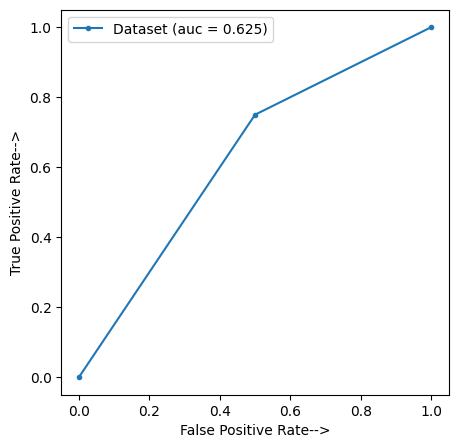

In [ ]:
fp_d, tp_d, threshold = roc_curve(df.X_actual, df.Y_predict)
auc_dataset = auc(fp_d, tp_d)

plt.figure(figsize=(5,5),dpi=100)
plt.plot(fp_d, tp_d, marker='.', label='Dataset (auc = %0.3f)' % auc_dataset)
plt.xlabel('False Positive Rate-->')
plt.ylabel('True Positive Rate-->')
plt.legend()
plt.show()